# Homework 7: Testing Hypotheses

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 7 is due **Friday, 10/25 at 11:59pm**. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. 

Directly sharing answers is not okay, but discussing problems with others is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [5]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw07.ok')
_ = ok.auth(inline=True)

Assignment: Homework 7: Testing Hypotheses
OK, version v1.14.15

Successfully logged in as rga2uz@virginia.edu


## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins $\$$9 from the casino if it comes up heads and loses $\$$10 if it comes up tails.

**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

In [6]:
p_winning_after_two_flips = (1/2)*(1/2)

In [7]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

**Question 2.** Define the null hypothesis and alternative hypothesis for this investigation. 

**Null hypothesis:** There is a 0.5, or 50%, probability of the dealer flipping heads and a 0.5, or 50%, probability of the dealer flipping tails. There is an equally likely chance of the customer winning or losing.

**Alternative hypothesis:** The probability of the dealer flipping heads is greater than 0.5. The customer has a greater chance of winning than under the assumptions made in the null.

**Question 3.** Given the outcome of 20 games, which of the following test statistics would be a reasonable choice for this hypothesis test? 

*Hint*: For a refresher on choosing test statistics, check out this section on [Test Statistics](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty.html#Step-2:-The-Test-Statistic).

1. Whether there is at least one win.
1. Whether there is at least one loss.
1. The number of wins.
1. The number of wins minus the number of losses.
1. The total variation distance between the probability distribution of a fair coin and the observed distribution of heads and tails.
1. The total amount of money that the customer won.

Assign `reasonable_test_statistics` to a **list** of numbers corresponding to these test statistics.

In [8]:
reasonable_test_statistics = [3, 4, 5, 6]

In [9]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
Suppose you decide to use the number of wins as your test statistic.

**Question 4.** Write a function called `simulate` that generates exactly one simulation of your test statistic under the Null Hypothesis.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin that lands heads or lands tails with 50% chance.

*Hint*: You may find the textbook [section](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models#predicting-the-statistic-under-the-model) on the `sample_proportions` function to be useful.

In [10]:
def simulate():
    return sample_proportions(20, [0.5, 0.5])[0]*20

simulate()

9.0

In [11]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Using 10,000 trials, generate simulated values of the number of wins in 20 games. Assign `test_statistics_under_null` to an array that stores the result of each of these trials.

*Hint*: Feel free to use the function you defined in Question 4.

In [12]:
test_statistics_under_null = make_array()
repetitions = 10000

for i in np.arange(repetitions):
    test_statistics_under_null = np.append(test_statistics_under_null, simulate())

test_statistics_under_null

array([12.,  8., 11., ...,  8.,  9., 12.])

In [13]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Using the results from Question 5, generate a histogram of the empirical distribution of the number of wins in 20 games.

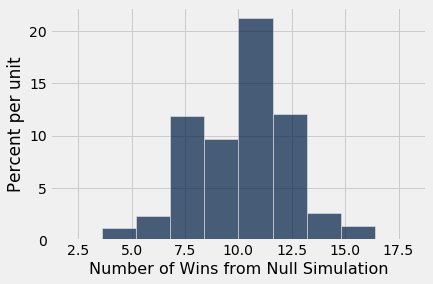

In [14]:
simulation_results = Table().with_column("Number of Wins from Null Simulation", test_statistics_under_null)
simulation_results.hist()

<div class="hide">\pagebreak</div>

**Question 7.** Compute an empirical P-value for this test.

*Hint:* Which values of our test statistic are in the direction of the alternative hypothesis?

In [15]:
# Larger values are in the direction of our test statistic.
# We want the probability based on test results of the die landing on heads at least 13 times, assuming the null is true. 
p_value = np.count_nonzero(test_statistics_under_null >= 13 ) / repetitions
p_value

0.135

In [16]:
_ = ok.grade('q1_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

With a cutoff of 1% and an empirical p-value of about 13%, we can conclude that the null hypothesis should NOT be rejected. A p-value of roughly 13% means the result of the simulation is not statistically significant. The observed statitic of 13 wins is not far away from the what the null predicts. 

**Question 9.** Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

Neither; the p_value is the chance, based on the model in the null hypothesis, that the test statistic will be equal to or more extreme than the value that was observed. Essentially, it is the probability derived from the 10,000 repititons under the assumption that the coin flip is fair that the number of times the coin lands on heads is equal to or greater than 13.

**Question 10.** Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

Neither; the 1% cutoff tells us that if the null hypothesis happens to be true, then there is about a 1% chance that our test will reject the null hypothesis. 

**Question 11.** Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customers were actually cheating, can we compute how many we will incorrectly accuse of cheating? If so, what is the number? Explain your answer. Assume a 1% P-value cutoff.

When we run this test on each customer, we are generating a new p-value that tells us the chance that the number of times the coin lands on heads is greater than the number of times the coin landed on heads for that specific customer. Rejecting the null hypothesis means the p-value is less than 1%. When we reject the null, we accuse the customer of cheating. If before running any tests we are trying to compute the number of times that we will incorrectly accuse a customer of cheating in the future, we can do it, but not with absolute certainty. A cutoff p-value of 1% means that there is about a 1% chance that our test will reject the null hypothesis, even if the null hypothesis is true. So, we can assume that we will accuse 4 people of cheating (1% of 400). If none of the customers were actually cheating, then we incorrectly accused 4 people. If instead we are trying to compute the number of people that we incorrectly accused of cheating after running all 400 tests, we would just add up the number of times we rejected the null hypothesis. 

## 2. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the very, very expensive vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

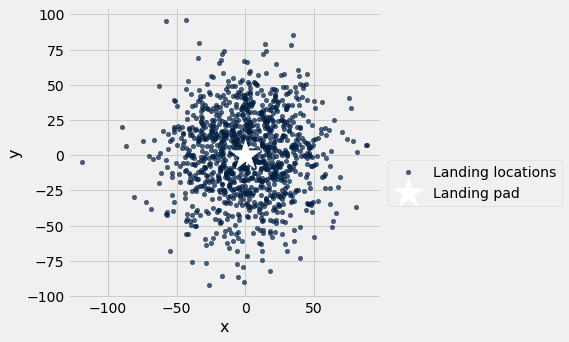

In [17]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

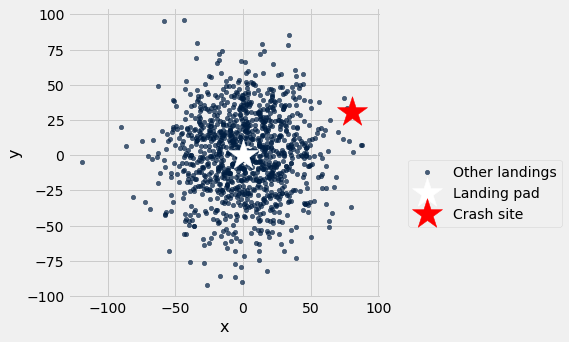

In [18]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

**Question 1.** Suppose we'd like to use hypothesis testing to shed light on this question.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** This landing was not special; its location was drawn from the same distribution.

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

**Question 2.** What's a good test statistic for this hypothesis test? 

*Hint:* A test statistic can be almost anything, but a *good* test statistic varies informatively depending on whether the null is true. So for this example, we might think about a test statistic that would be small if the null is true, and large otherwise. If we want to compare landings, we might want to see *how far* each landing is from some *reference point*, so we can compare all landings from the same vantage point.

**Test statistic:** The distance of the landing from the landing pad. 

**Question 3.** Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [19]:
# Uses distance formula; landing pad located at (0,0), so it is essentially the Pythagorean Theorem
def landing_test_statistic(x_coordinate, y_coordinate):
    return np.sqrt((x_coordinate ** 2) + (y_coordinate ** 2))

**Question 4.** The next three cells compute a P-value using your test statistic. Describe the test procedure in words. Is there a simulation involved? If so, what is being simulated? If not, why not? Where are we getting the data from? What kind of calculations are being performed? How are we calculating our p-value? 

*Hint:* Think about what a [simulation](https://www.inferentialthinking.com/chapters/09/3/simulation.html) actually consists of.

In [20]:
observed_test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

observed_test_stat

86.31440320131978

In [21]:
null_stats = make_array()
repetitions = ordinary_landing_spots.num_rows

for i in np.arange(repetitions):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)
    
null_stats

array([ 7.0373003 , 37.04323884, 28.24132651, ..., 20.84023432,
       32.48926398, 23.88691421])

In [22]:
p_value = np.count_nonzero(null_stats >= observed_test_stat) / len(null_stats)
p_value

0.012727272727272728

In the first cell, the observed test statistic is being computed using the landing_test_statistic function created previously; this is the distance from the crash site to the landing pad. A simulation is not being ran; the next cell uses the actual data provided in the ordinary_landing_spots table. For each of the 1100 "ordinary" landings, the distance between that landing and the landing pad is being computed; each distance is added to an array null_stats. The third and final cell computes a p-value by counting the number of distances in the null_stats array that are greater than or equal to the observed_test_statistic, or the distance between the crash site and the landing pad, and dividing this number by the length of the null_stats array, or 1100. The p-value is the chance, or probability, that the test statistic, or the actual distance between a landing and the landing pad, will be greater than the observed test statistic, or the distance of the crash site from the landing pad.

## 3. Testing Dice


Students in a statistics class want to figure out whether a six-sided die is fair or not. On a fair die, each face of the die appears with chance 1/6 on each roll, regardless of the results of other rolls.  Otherwise, a die is called unfair.  We can describe a die by the probability of landing on each face.  This table describes an example of a die that is unfairly weighted toward 1:

|Face|Probability|
|-|-|
|1|.5|
|2|.1|
|3|.1|
|4|.1|
|5|.1|
|6|.1|

**Question 1.** Define a null hypothesis and an alternative hypothesis to test whether a six-sided die is fair or not. 

*Hint:* Remember that an unfair die is one for which each face does not have an equal chance of appearing.

**Null hypothesis:** The die is fair; each side has an equal chance of appearing.

**Alternative hypothesis:** The die is not fair; each side does not have an equal chance of appearing.

We decide to test the die by rolling it 5 times. The proportions of the 6 faces in these 5 rolls are stored in a table with 6 rows.  For example, here is the table we'd make if the die rolls ended up being 1, 2, 3, 3, and 5:

|Face|Proportion|
|-|-|
|1|.2|
|2|.2|
|3|.4|
|4|.0|
|5|.2|
|6|.0|

The function `mystery_test_statistic`, defined below, takes a single table like this as its argument and returns a number (which we will use as a test statistic).

In [23]:
# Note: We've intentionally used unhelpful function and
# variable names to avoid giving away answers.  It's rarely
# a good idea to use names like "x" in your code.

def mystery_test_statistic(sample):
    x = np.ones(1) * (1/6)
    y = (sample.column('Proportion') - x)
    return np.mean(y**2)

**Question 2.** Describe in English what the test statistic is.  Is it equivalent to the total variation distance between the observed face distribution and the fair die distribution?

The test statistic is the total variation distance between the observed face distribution and the fair die distribution. For each face in the sample table, 1/6 is subtracted from its corresponding proportion to obtain the distance between each of the fair and observed proportions. Each of these distances is squared, and then the average of the sqaured values is taken to obtain the distance between the two distributions.

The function `simulate_observations_and_test` takes as its argument a table describing the probability distribution of a die.  It simulates one set of 5 rolls of that die, then tests the null hypothesis about that die using our test statistic function above.  It returns `False` if it *rejects* the null hypothesis about the die, and `True` otherwise.

In [24]:
# The probability distribution table for a fair die:
fair_die = Table().with_columns(
        "Face", np.arange(1, 6+1),
        "Probability", [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

def simulate_observations_and_test(actual_die):
    """Simulates die rolls from actual_die and tests the hypothesis that the die is fair.
    
    Returns False if that hypothesis is rejected, and True otherwise.
    
    """
    
    sample_size = 5
    p_value_cutoff = .2
    num_simulations = 250
    
    # Compute the observed value of the test statistic.
    observation_set = sample_proportions(sample_size, actual_die.column("Probability"))
    observation_props_table = Table().with_columns('Face', actual_die.column('Face'), 'Proportion', observation_set)
    observed_statistic = mystery_test_statistic(observation_props_table)
    
    # Simulate the test statistic repeatedly to get an 
    # approximation to the probability distribution of 
    # the test statistic, as predicted by the model in 
    # the null hypothesis. Store the simulated values 
    # of the test statistic in an array.
    simulated_statistics = make_array()
    for _ in np.arange(num_simulations):
        one_observation_set_under_null = sample_proportions(sample_size, fair_die.column("Probability"))
        simulated_props_table = Table().with_columns('Face', fair_die.column('Face'), 'Proportion', one_observation_set_under_null)
        simulated_statistic = mystery_test_statistic(simulated_props_table)
        simulated_statistics = np.append(simulated_statistics, simulated_statistic)
        
    # Compute the P-value
    p_value = np.count_nonzero(simulated_statistics >= observed_statistic) / num_simulations
    
    # If the P-value is below the cutoff, reject the 
    # null hypothesis and return False. Otherwise, 
    # return True.
    return p_value >= p_value_cutoff

# Calling the function to simulate a test of a fair die:
simulate_observations_and_test(fair_die)

True

**Question 3.** Use your knowledge of hypothesis tests and interpretation of the code above to compute the probability that `simulate_observations_and_test` returns `False` when its argument is `fair_die` (which is defined above the function). In other words, what are the odds that we reject the Null Hypothesis if the die is actually fair. 

You can call the function a few times to see what it does, but **don't** perform a simulation to compute this probability.  Use your knowledge of hypothesis tests. You shouldn't have to write any code to answer this question.

In [25]:
probability_of_false = .2

In [26]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Why is your answer to Question 3 the correct probability?

The p-value cutoff is decided by those running the experiment; smaller p-values are more conservative. The p-value is defined in the code above as p_value_cutoff = 0.2. The p-value cutoff, if used, is the chance that the simulation test will conclude that the alternative hypothesis is true if the null hypothesis happens to be true. The point of the cutoff is to control the chance of concluding that the die is unfair if it is in fact fair. For this test, if the computed p-value is greater than or equal to the cutoff, then we do not reject the null hypothesis. This is the same as saying that if the percent of simulated total variation distances under the null model that are equal to or greater than observed total variation distance is more than 20%, we assume the die is fair.

**Question 5.** Simulate the process of running `simulate_observations_and_test` 300 times. Assign `test_results` to an array that stores the result of each of these trials.

**Note:** This will be a little slow. 300 repetitions of the simulation should require a minute or so of computation, and should suffice to get an answer that's roughly correct.

In [27]:
num_test_simulations = 300
test_results = make_array()

for i in np.arange(num_test_simulations):
    test_results = np.append(test_results, simulate_observations_and_test(fair_die))

# Don't change the following line.
test_results.astype(bool)

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [28]:
_ = ok.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Verify your answer to Question 3 by computing an approximate probability that `simulation_observations_and_test` returns `False`.

In [29]:
approximate_probability_of_false = 1 - (np.count_nonzero(test_results) / 300)
approximate_probability_of_false

0.1333333333333333

In [30]:
_ = ok.grade('q3_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.** From the perspective of someone who wants to know the truth about the die, is it good or bad for the function to return `False` when its argument is `fair_die`? Why is it good or bad?

It is not necessarily good or bad for the simulate_observations_and_test function to return False when its argument is fair_die. With this argument, we are comparing the results of a simulation based on the null model, or the assumption that the die is fair, with the proportions of the faces on the observed die. If the function returns False, we assume the observed die is not fair. If the function returns True, we assume the observed die is fair. Either way, we can know the "truth" about the die, although there is room for error. The p-value cutoff, as mentioned earlier, is not very conservative; a 20% chance of our test concluding that the die is not fair when it is in fact fair is pretty large. If you wanted to be more certain, then the cutoff should be lowered. This way, someone wanting to know the "truth" about a die can be more sure that it is not fair when the function returns False.

## 4. A Potpourri of Tests


The rest of this homework is optional. Do it for your own practice, but it will not be incorporated into the final grading!

**Question 1 (Optional).** Many scientific disciplines use 5% as a standard cutoff for rejecting the null hypothesis when conducting hypothesis tests.  Suppose for sake of argument that every scientific paper hinges on exactly one hypothesis test with a 5% cutoff.  After learning about hypothesis testing, Thomas despairs about the state of scientific research, wondering:

> "Doesn't this mean that 5% of all scientific papers are wrong?"

Under what conditions would Thomas’s worry be realistic? Under what conditions would Thomas's worry even be a conservative estimate?

*Write your answer here, replacing this text.*

**Question 2 (Optional).** Many scientists hope to make exciting and unintuitive discoveries.  Often the null hypothesis in an hypothesis test is something boring ("the sky is blue"), while the alternative is surprising ("the sky is not blue!").

Suppose a scientist has an exciting but incorrect idea, so that their null hypothesis is *truly correct*.  When an hypothesis test is run on a sample of data, it fails to reject the null when using a 5% cutoff.  Disappointed but determined, the scientist gathers 10 more samples and runs the same test on each sample (running 10 separate hypothesis tests, each with a 5% cutoff).  If any of the tests rejects the null, the scientist publishes that one.  What is the chance that any of those tests rejects the null hypothesis?

*Write your answer here, replacing this text.*

**Note:** The scientist in this scenario is acting very unethically, but (probably milder) forms of this [*publication bias*](https://en.wikipedia.org/wiki/Publication_bias) seem to be a real problem in science today. See a relevant [xkcd](https://xkcd.com/882/) below.

![So, uh, we did the green study again and got no link. It was probably a--' 'RESEARCH CONFLICTED ON GREEN JELLY BEAN/ACNE LINK; MORE STUDY RECOMMENDED!](https://imgs.xkcd.com/comics/significant.png)

## 5. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [31]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Submit... 100% complete
Submission successful for user: rga2uz@virginia.edu
URL: https://okpy.org/uva/stat_1602/fa19/hw7/submissions/k2D26Y



In [32]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t